In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from CI_Experiments.config import PROJECT_DIR

GRAPH_TABLE_CELL_LOC = 'left'
GRAPH_TABLE_COL_WIDTHS = [0.2, 0.8]
GRAPH_TABLE_HEADERS = ['Node nr', 'Name']
GRAPH_TABLE_HEADERS_COLORS = ['y', 'y']


In [6]:
GRAPH_LOAD_PATH = PROJECT_DIR / 'experiments/results/BPIC2017/activity_time/discovery_result.csv'
GRAPH_SAVE_PATH = PROJECT_DIR / 'experiments/results/BPIC2017/activity_time'

In [2]:
def formulate_headers_as_table_row(columns):
    return list(map(lambda i_header: [str(i_header[0]), i_header[1].strip()], enumerate(columns)))


In [54]:
def draw_graph(graph, identifier_name, columns, path):
    G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
    nodes_legend_table = formulate_headers_as_table_row(columns)
    fig, ax = plt.subplots(1,1)
    nx.draw_networkx(G, arrows=True, with_labels=True, pos=nx.circular_layout(G))
    table = ax.table(
        nodes_legend_table,
        cellLoc=GRAPH_TABLE_CELL_LOC,
        colColours=GRAPH_TABLE_HEADERS_COLORS,
        colWidths=GRAPH_TABLE_COL_WIDTHS,
        colLabels=GRAPH_TABLE_HEADERS
    )
    path_to_graph_image = f'{path}/{identifier_name}_causal_graph.png'
    fig.savefig(path_to_graph_image, bbox_inches='tight')


In [78]:
def eval_graph(causal_discovery_results, identifier_name):
    graph = causal_discovery_results[causal_discovery_results['identifier_name']==identifier_name]['causal_graph'].values[0]
    graph = graph.replace('.\n', '.').replace('.]', ']').replace('.', ',').replace('\n', ',')
    graph = eval(graph)
    graph = np.array(graph)
    return graph

In [8]:
identifier_name = 'notears'

In [93]:
causal_discovery_results = pd.read_csv(GRAPH_LOAD_PATH)
causal_discovery_results

,identifier_name,treatment,adjustment,covariate,instrument,duration,causal_graph
0,notears,"['Activity_W_Call incomplete files', 'Activity...",NaN,"['Activity_A_Accepted', 'Activity_A_Complete',...",NaN,833.776504,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....
1,gcastle_DirectLiNGAM,"['Activity_A_Accepted', 'Activity_A_Cancelled'...",NaN,"['Activity_A_Concept', 'Activity_A_Create Appl...",NaN,19.177614,[]
2,gcastle_ICALiNGAM,"['Activity_A_Accepted', 'Activity_A_Cancelled'...",NaN,"['Activity_A_Concept', 'Activity_A_Create Appl...",NaN,2.586814,[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....
3,gcastle_Notears,"['Activity_A_Accepted', 'Activity_A_Cancelled'...",NaN,"['Activity_A_Concept', 'Activity_A_Create Appl...",NaN,4.725055,[]
4,gcastle_NotearsNonlinear,"['Activity_A_Accepted', 'Activity_A_Cancelled'...",NaN,"['Activity_A_Create Application', 'Activity_A_...","['Activity_A_Concept', 'Activity_A_Submitted',...",184.844214,[[0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1....
5,gcastle_GOLEM,"['Activity_A_Accepted', 'Activity_A_Cancelled'...",NaN,"['Activity_A_Concept', 'Activity_A_Create Appl...",NaN,1119.662663,[[0. 1.]\n [0. 0.]]
6,pgm_TreeSearch,['Activity_W_Call after offers'],NaN,['Activity_W_Complete application'],NaN,1.378312,[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....


In [89]:
graph = eval_graph(causal_discovery_results, 'notears')
graph

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
columns = [
    'Activity_O_Accepted',
    'Outcome',
    'Activity_A_Accepted',
    'Activity_A_Cancelled',
    'Activity_A_Complete',
    'Activity_A_Concept',
    'Activity_A_Create Application',
    'Activity_A_Denied',
    'Activity_A_Incomplete',
    'Activity_A_Pending',
    'Activity_A_Submitted',
    'Activity_A_Validating',
    'Activity_O_Accepted',
    'Activity_O_Cancelled',
    'Activity_O_Create Offer',
    'Activity_O_Created',
    'Activity_O_Refused',
    'Activity_O_Returned',
    'Activity_O_Sent (mail and online)',
    'Activity_O_Sent (online only)',
    'Activity_W_Assess potential fraud',
    'Activity_W_Call after offers',
    'Activity_W_Call incomplete files',
    'Activity_W_Complete application',
    'Activity_W_Handle leads',
    'Activity_W_Personal Loan collection',
    'Activity_W_Shortened completion',
    'Activity_W_Validate application',
]

In [30]:
path = GRAPH_SAVE_PATH

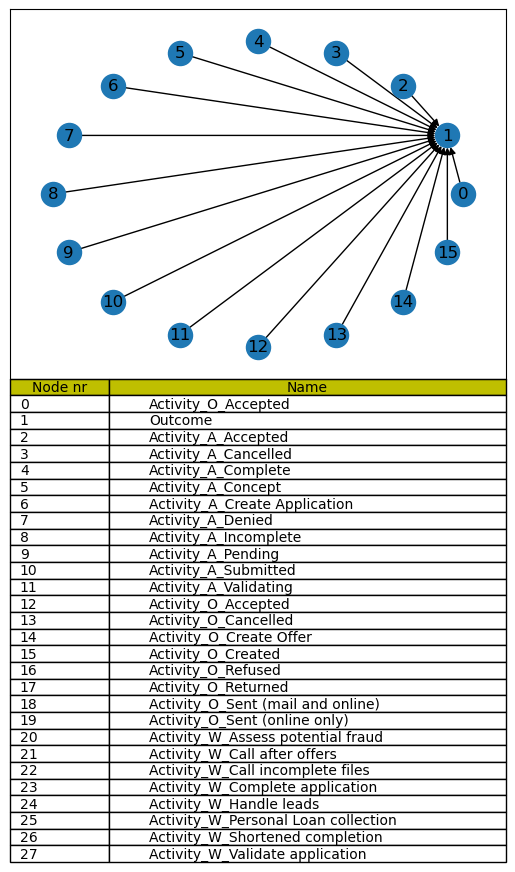

In [55]:
draw_graph(graph, identifier_name, columns, path)

In [81]:
identifier_name_2 = 'pgm_TreeSearch'

In [94]:
graph_2 = eval_graph(causal_discovery_results, identifier_name_2)
graph_2

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [84]:
columns_2 = [
    'Activity_O_Accepted',
    'Activity_A_Accepted',
    'Activity_A_Cancelled',
    'Activity_A_Complete',
    'Activity_A_Concept',
    'Activity_A_Create Application',
    'Activity_A_Denied',
    'Activity_A_Incomplete',
    'Activity_A_Pending',
    'Activity_A_Submitted',
    'Activity_A_Validating',
    'Activity_O_Accepted',
    'Activity_O_Cancelled',
    'Activity_O_Create Offer',
    'Activity_O_Created',
    'Activity_O_Refused',
    'Activity_O_Returned',
    'Activity_O_Sent (mail and online)',
    'Activity_O_Sent (online only)',
    'Activity_W_Assess potential fraud',
    'Activity_W_Call after offers',
    'Activity_W_Call incomplete files',
    'Activity_W_Complete application',
    'Activity_W_Handle leads',
    'Activity_W_Personal Loan collection',
    'Activity_W_Shortened completion',
    'Activity_W_Validate application',
    'Outcome'
]


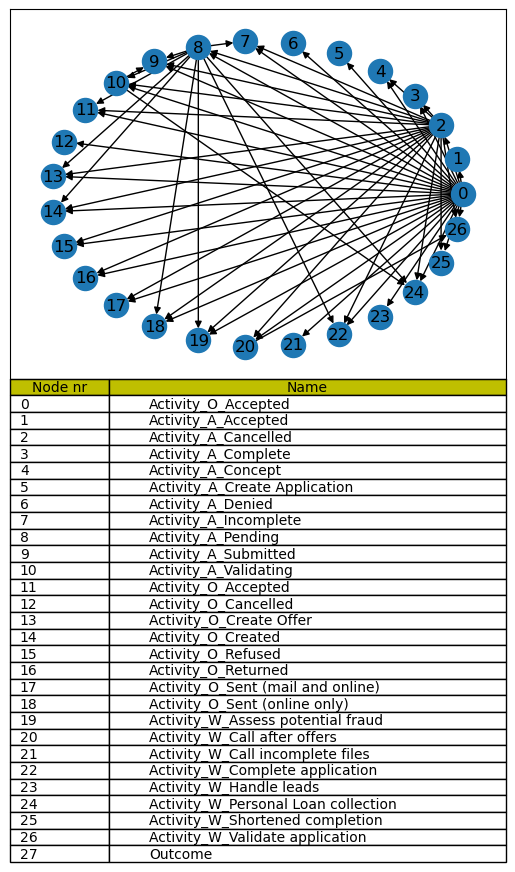

In [95]:
draw_graph(graph_2, identifier_name_2, columns_2, path)